In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def start_fire(m,n,p=0.0005,burning_time=10): #width,height,prob
    M = np.zeros([m,n])
    count_down = np.zeros([m,n])
    M_p = np.random.rand(m,n)
    M[M_p>(1-p)] = 3
    count_down[M_p>(1-p)] = burning_time
    return M,count_down

In [3]:
def burning_prob(wind_dir): #[0,1] from south [1,0] from east
    prob = np.zeros(4)
    beta = 2

    p_x = 0.8*(1-np.exp(-beta*abs(wind_dir[0])))
    p_y = 0.8*(1-np.exp(-beta*abs(wind_dir[1])))
    prob[0] = random.uniform(0.5-np.sign(wind_dir[0])*p_x, 1) #x-
    prob[2] = random.uniform(0.5+np.sign(wind_dir[0])*p_x, 1) #x+
    prob[1] = random.uniform(0.5-np.sign(wind_dir[1])*p_y,1) #y-
    prob[3] = random.uniform(0.5+np.sign(wind_dir[1])*p_y,1) #y+
    return prob

In [4]:
def if_burning_around(M,i,j,wind_dir): #simplest
    tmp = 0
    m = np.size(M,0) #size
    n = np.size(M,1)
    prob = burning_prob(wind_dir)
    tol = 0.95

    if(i!=0 and M[i-1,j]==3 and prob[3]>tol): 
        tmp = 1 
    elif(j!=0 and M[i,j-1]==3 and prob[0]>tol): tmp = 1
    elif(i!=(m-1) and M[i+1,j]==3 and prob[1]>tol): tmp = 1
    elif(j!=(n-1) and M[i,j+1]==3 and prob[2]>tol): tmp = 1

    if(tmp==1): return True
    else: return False

In [5]:
def update(M,count_down,density,burning_time = 10,growing_time = 50,wind_dir=[0,0]):
    m = np.size(M,0) #size
    n = np.size(M,1)
    M_copy = np.zeros([m,n])
    count_down_copy = count_down
    for i in np.arange(m):
        for j in np.arange(n):
            if(count_down_copy[i,j]!=0):
                count_down_copy[i,j] -= 1
            if(M[i,j]==0): #flammable
                if(if_burning_around(M,i,j,wind_dir)):
                    M_copy[i,j] = 3
                    count_down_copy[i,j] = burning_time*density[i,j]
            elif(M[i,j]==3 and count_down_copy[i,j]==0):#burning
                #burnt time reached     
                M_copy[i,j] = 2 #burnt
            elif(M[i,j]==3 and count_down_copy[i,j]!=0):
                M_copy[i,j] = 3
            elif(M[i,j]==2): #burnt
                M_copy[i,j] = 1 #growing
                count_down_copy[i,j] = np.random.randint(growing_time-10,growing_time+10)
            elif(M[i,j]==1 and count_down_copy[i,j]==0): 
                M_copy[i,j] = 0 #flammable
            elif(M[i,j]==1 and count_down_copy[i,j]!=0): 
                M_copy[i,j] = 1 
    return M_copy,count_down_copy

In [6]:
def plot_M(M,ax):
    ax.axis('off')
    m = np.size(M,0) #size
    n = np.size(M,1)
    line = []

    x,y = np.meshgrid(np.arange(m),np.arange(n))
    x = x.flatten()
    y = y.flatten()
    categories = M.flatten()

    color_map = {0:'y',1:'g',2:'b',3:'r'}
    colors = [color_map[cat] for cat in categories]
    for cat in color_map:
        mask = categories == cat
        line.append(ax.scatter(x[mask], y[mask], c=color_map[cat], label=cat))
    
    return line

In [7]:
def plot_mesh(M):
    m = np.size(M,0) #size
    n = np.size(M,1)

    x,y = np.meshgrid(np.arange(m),np.arange(n))

    plt.pcolormesh(x, y, M)
    plt.show()

In [8]:
def wind(i,N):
    theta = np.pi/N*i
    return [50*np.cos(theta),50*np.sin(theta)]

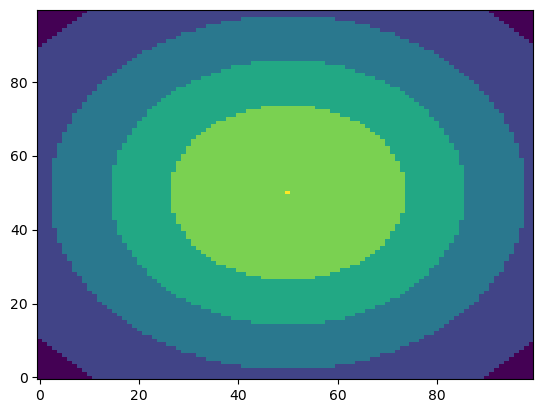

MovieWriter imagemagick unavailable; using Pillow instead.


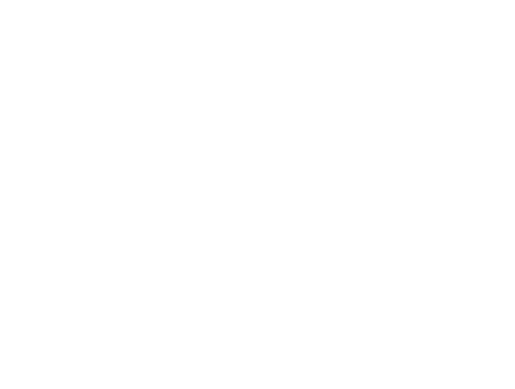

In [9]:
from matplotlib.animation import ArtistAnimation

n= 100
M,count_down = start_fire(n,n)
#density = np.random.randint(1,6,size=(m,n))
density = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        density[i,j] = int(5*np.exp(-((2*i-n)/n)**2-((2*j-n)/n)**2))+1 
plot_mesh(density)
fig, ax = plt.subplots()
artists = []
N = 300

for i in range(N):
    M,count_down = update(M,count_down,density,burning_time=5)

    line = plot_M(M,ax)
    artists.append(line)
 
anim = ArtistAnimation(fig, artists)
anim.save('fire_density.gif', writer='imagemagick')